In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(
    '/Users/Celia/Desktop/machine-learning-programming-assignments-coursera-andrew-ng-master/machine-learning-ex1/ex1data1.txt'
    ,header = None)

In [6]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
df.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit Vs Population')

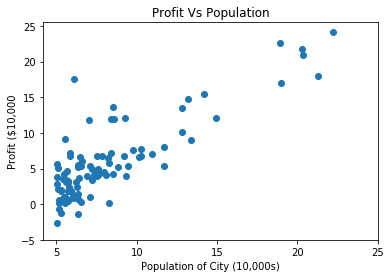

In [8]:
plt.scatter(df[0],df[1])
plt.xticks(np.arange(5,30,step = 5))
plt.yticks(np.arange(-5,30,step = 5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Vs Population")

In [32]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function    
    of using theta as parameter in a linear regression model
    """
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y)**2
    return 1/(2*m) * np.sum(square_err)

In [33]:
#Initialize X,y and compute the cost of using Θ = (0,0)
df_n = df.values
m = len (df_n[:,-1])
X = np.append(np.ones((m,1)), df_n[:,0].reshape(m,1),axis = 1)
y = df_n[:,1].reshape(m,1)
theta = np.zeros((2,1))

In [34]:
computeCost(X,y,theta)

32.072733877455676

In [35]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    m = len(y)
    J_history = []
    
    for i in range (num_iters) :
        predictions = X.dot(theta)
        error = np.dot(X.T,(predictions - y))
        delta_theta = alpha * (1/m) * error
        theta -= delta_theta
        J_history.append(computeCost(X,y,theta))
    return theta,J_history    

In [41]:
theta,J_history = gradientDescent(X,y,theta,0.01,1500)


In [39]:
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.88 + 1.19x1


In [42]:
from mpl_toolkits.mplot3d import Axes3D


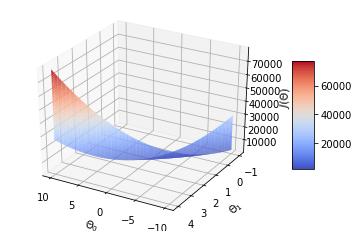

In [43]:
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j] = computeCost(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
surf = ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap = "coolwarm")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

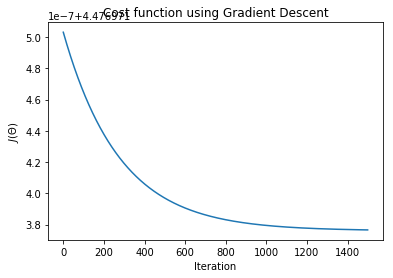

In [44]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit vs Population')

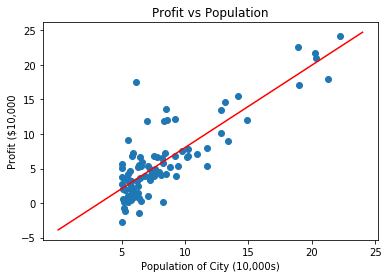

In [46]:
plt.scatter(df[0],df[1])
x_value = [x for x in range(25)]
y_value = [y*theta[1] + theta[0] for y in x_value]
plt.plot(x_value,y_value,color = "r")
plt.xticks(np.arange(5,30,step = 5))
plt.yticks(np.arange(-5,30,step = 5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit vs Population")

In [50]:
def predict (x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    predictions = np.dot(theta.T,x)
    return predictions[0]

In [51]:
my_predict = predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(my_predict,0)))

For population = 35,000, we predict a profit of $2799.0


In [53]:
my_predict2 = predict(np.array([1,7]),theta)*10000
print("For population = 70,000, we predict a profit of $"+str(round(my_predict2,0)))

For population = 70,000, we predict a profit of $44555.0


### multivariate linear regression

In [54]:
df2 = pd.read_csv(
    '/Users/Celia/Desktop/machine-learning-programming-assignments-coursera-andrew-ng-master/machine-learning-ex1/ex1data2.txt'
    ,header = None)

In [55]:
df2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [56]:
df2.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


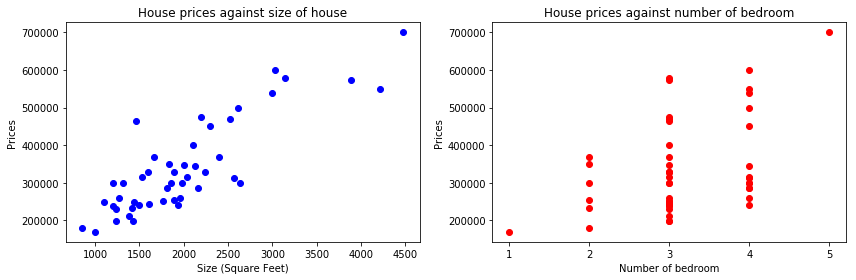

In [57]:
# Create 2 subplot, 1 for each variable
fig, axes = plt.subplots(figsize = (12,4),nrows = 1,ncols = 2)
axes[0].scatter(df2[0],df2[2],color = "b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(df2[1],df2[2],color = "r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step = 1))
axes[1].set_title("House prices against number of bedroom")
# Enhance layout
plt.tight_layout()

In [58]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    
    """
    mean = np.mean(X, axis = 0)
    std = np.std(X,axis = 0)
    
    X_norm = (X - mean)/std
    return X_norm, mean, std


In [72]:
df_n2 = df2.values
m2 = len(df_n2[:,-1])
X2 = df_n2[:,0:2].reshape(m2,2)
X2, mean_X2, std_X2 = featureNormalization(X2)
X2 = np.append(np.ones((m2,1)),X2,axis=1)
y2 = df_n2[:,-1].reshape(m2,1)
theta2 = np.zeros((3,1))


In [73]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,0.01,400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =334302.06 + 99411.45x1 + 3267.01x2


In [74]:
theta2

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

Text(0.5, 1.0, 'Cost function using Gradient Descent')

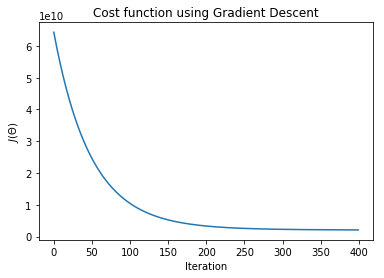

In [75]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [76]:
#feature normalisation of x values
x_sample = featureNormalization(np.array([1650,3]))[0]
x_sample = np.append(np.ones(1),x_sample)
predict3 = predict(x_sample,theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))

For size of house = 1650, Number of bedroom = 3, we predict a house value of $430447.0
